In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn import ensemble
from sklearn import preprocessing

In [189]:
# import training data with folds
df = pd.read_csv("../input/Mobile_train_fold.csv")

# import test data
df_test = pd.read_csv("../input/Mobile_test.csv")

# Combining train/Test set
all_data = [df,df_test]

In [172]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [173]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,kfold
0,1279,1,2.5,0,5,1,7,0.5,105,6,6,560,1633,1150,7,2,7,1,0,0,1,0
1,846,1,2.6,0,0,1,58,0.1,123,4,15,1140,1983,2248,16,8,13,1,0,0,2,0
2,1084,1,2.6,0,3,1,40,0.9,107,3,11,322,771,1945,15,4,10,1,1,0,1,0
3,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3,0
4,1054,1,1.8,1,3,1,40,0.8,196,7,10,27,774,2296,16,12,12,1,0,1,1,0


In [190]:
# Check if there is any skewed validation dataset 
# after using Stratified K-fold
print("Fold = 0 --> " , df[df.kfold == 0]["price_range"].value_counts())
print("Fold = 1 --> " , df[df.kfold == 1]["price_range"].value_counts())
print("Fold = 2 --> " , df[df.kfold == 2]["price_range"].value_counts())
print("Fold = 3 --> " , df[df.kfold == 3]["price_range"].value_counts())
print("Fold = 4 --> " , df[df.kfold == 4]["price_range"].value_counts())

Fold = 0 -->  3    100
2    100
1    100
0    100
Name: price_range, dtype: int64
Fold = 1 -->  3    100
2    100
1    100
0    100
Name: price_range, dtype: int64
Fold = 2 -->  3    100
2    100
1    100
0    100
Name: price_range, dtype: int64
Fold = 3 -->  3    100
2    100
1    100
0    100
Name: price_range, dtype: int64
Fold = 4 -->  3    100
2    100
1    100
0    100
Name: price_range, dtype: int64


In [175]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,kfold
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000,2.000000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314,1.414567
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,2.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,3.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,4.000000


In [ ]:
## FEATURE ENGINEERING - FEATURE SELECTION ##

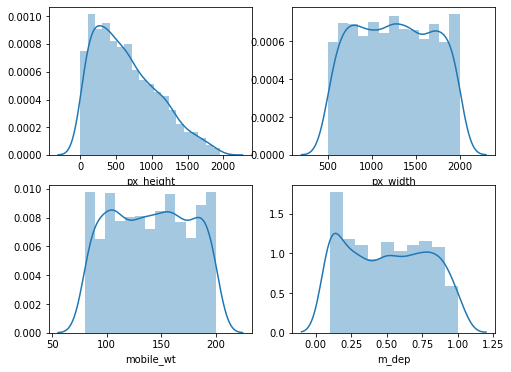

In [191]:
## display distribution of "px_height", "px_width", "mobile_wt", "m_dep"
plt.figure(figsize = (8,6))

plt.subplot(2,2,1)
plt.xlabel("Pixel height")
sns.distplot(a = df["px_height"])

plt.subplot(2,2,2)
plt.xlabel("Pixel width")
sns.distplot(a = df["px_width"])

plt.subplot(2,2,3)
plt.xlabel("Mobile weight")
sns.distplot(a = df["mobile_wt"])

plt.subplot(2,2,4)
plt.xlabel("Mobile depth")
sns.distplot(a = df["m_dep"])

In [192]:
## binning each of those features into 3 categ
for data in all_data:
    data["px_height_bin3"] = pd.cut(data["px_height"], bins = 3, labels = False)
    data["px_width_bin3"] = pd.cut(data["px_width"], bins = 3, labels = False)
    data["Mobile_wt_bin3"] = pd.cut(data["mobile_wt"], bins = 3, labels = False)
    data["m_dep_bin3"] = pd.cut(data["m_dep"], bins = 3, labels = False)

In [193]:
for data in all_data:
    ## Create new_feature size screen
    data["size_screen"] = data["sc_h"] * data["sc_w"]
    data["size_screen"] = data["size_screen"].apply(lambda x : np.log(1 + x))

    # New feature display px_resolution
    data["px_res"] = data["px_height"] * data["px_width"]

    # New features mobile_g 
    # mobile_g = 1 if the mobile has four_g/three_g else 0
    data["mobile_g"] = data["four_g"] + data["three_g"]
    data["mobile_g"] = data["mobile_g"].apply(lambda x : 1 if x >= 1 else 0)

In [194]:
# Compute variance of Each Feature #

# empty dict #
var_dict = {}

# features  : All columns except "kfold" and "price_range" #
features = [feat for feat in df.columns if feat not in ("price_range","kfold")]

# compute variance
for f in features:
    var_dict[f] = np.var(df[f])

print(var_dict)

# CONCLUSION # : Some features have high variance compared to others, so we should reduce their variance #
# One way to do that, is to apply log transformation #

{'battery_power': 192991.81565775, 'blue': 0.249975, 'clock_speed': 0.6655299375, 'dual_sim': 0.24990975, 'fc': 18.83870975, 'four_g': 0.24953774999999997, 'int_memory': 329.10233775, 'm_dep': 0.0831419375, 'mobile_wt': 1252.5089990000001, 'n_cores': 5.23157975, 'pc': 36.75752775, 'px_height': 196842.937336, 'px_width': 186702.96375974998, 'ram': 1176055.2846310001, 'sc_h': 17.742557749999996, 'sc_w': 18.968711000000003, 'talk_time': 29.839878999999996, 'three_g': 0.18161775000000002, 'touch_screen': 0.24999099999999996, 'wifi': 0.24995100000000003, 'px_height_bin3': 0.43647099999999994, 'px_width_bin3': 0.6554997499999999, 'Mobile_wt_bin3': 0.6678999999999998, 'm_dep_bin3': 0.6662797500000002, 'size_screen': 2.2637700441272957, 'px_res': 688161548418.7496, 'mobile_g': 0.18161775000000002}


In [195]:
# choose features with high variance i.e > 100 #
High_var_feat = [feat for feat,value in var_dict.items() if value>100]

# appy log transformation
for f in High_var_feat:
    df[f] = df[f].apply(lambda x : np.log(1+x))

In [196]:
# Preparing two list to plot barplot after

# First : columns name
col_names = list(set(df.columns).difference(set(["kfold","price_range"])))
var_dict_ = {}

# Second : variance of each columns
col_var = []
for col in col_names:
    var_dict_[col] = df[col].var()
    col_var.append(df[col].var())


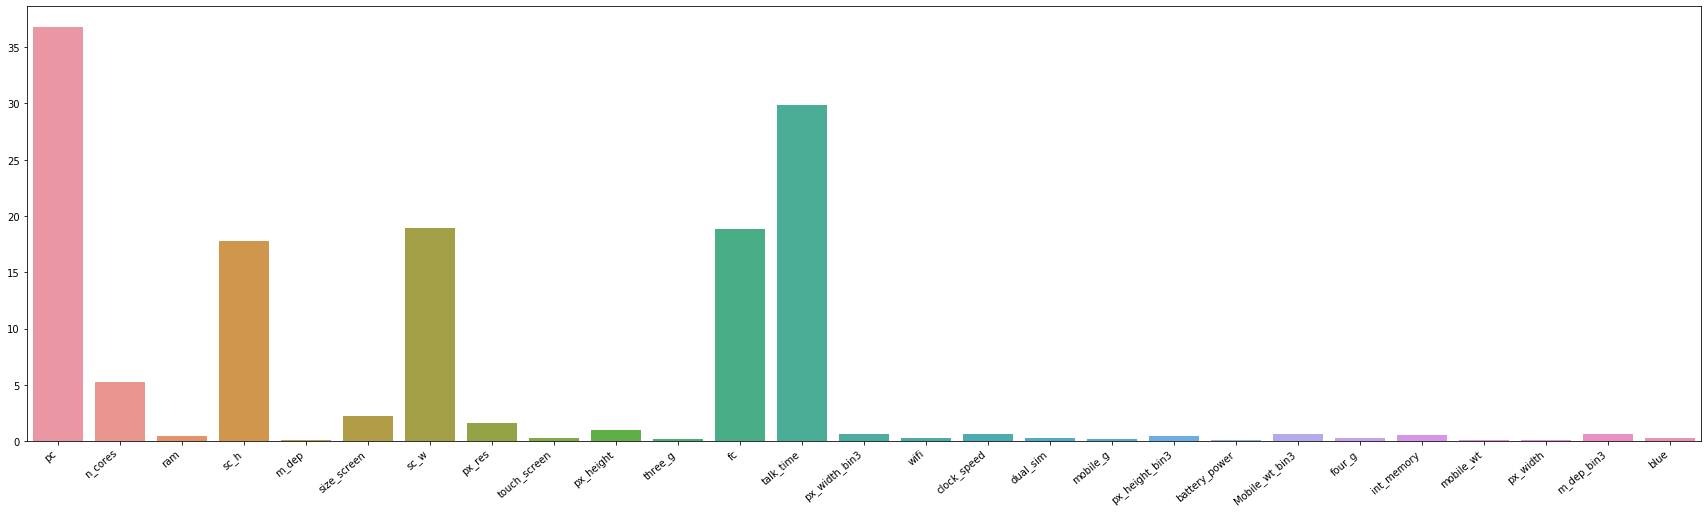

In [197]:
# barplot to show variance of each feature
plt.figure(figsize=(30,8))
ax = sns.barplot(x = col_names,y = col_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha = "right")
plt.show()

# Features with low variance contribute less to our model
# Perhaps it can be useful to remove feature with low variance i.e < 0.1
# but I prefer to use feature_importance selection after that I will see
# how if I remove variables with low variances

In [198]:
## Correlation between features
df.corr()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,kfold,px_height_bin3,px_width_bin3,Mobile_wt_bin3,m_dep_bin3,size_screen,px_res,mobile_g
battery_power,1.000000,0.007222,0.018524,-0.044365,0.029505,0.012937,0.005994,0.035178,0.000193,-0.032848,0.029341,0.013471,-0.012494,-0.009089,-0.030104,-0.021771,0.054588,0.012150,-0.009327,-0.005367,0.194025,-0.006397,0.019806,-0.007025,-0.005772,0.036502,-0.030991,0.004960,0.012150
blue,0.007222,1.000000,0.021419,0.035198,0.003593,0.013443,0.032133,0.004049,-0.006642,0.036161,-0.009952,-0.009516,-0.035474,0.026346,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573,0.009193,-0.011762,-0.050032,-0.009912,-0.001783,0.029485,-0.017969,-0.030236
clock_speed,0.018524,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.007497,-0.014364,0.011703,-0.005724,-0.005245,-0.009494,-0.011960,0.003355,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,0.002340,-0.020385,-0.011414,0.012408,-0.017570,-0.022213,-0.014529,-0.046433
dual_sim,-0.044365,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.018252,-0.022142,-0.010640,-0.024658,-0.017143,-0.006987,0.011739,0.038008,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444,0.001414,-0.027155,0.015454,0.011247,-0.009540,-0.030373,0.004323,-0.014008
fc,0.029505,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.053720,-0.001791,0.023291,-0.013356,0.644595,-0.017092,-0.004921,0.020676,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998,0.041788,-0.003790,0.001325,0.022862,-0.001550,-0.008295,-0.016861,0.001793
four_g,0.012937,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.001964,-0.001823,-0.014020,-0.029706,-0.005598,-0.036123,0.008773,-0.000153,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772,-0.009909,-0.011346,0.009299,-0.009271,0.001112,0.036141,-0.031405,0.584246
int_memory,0.005994,0.032133,0.007497,-0.018252,-0.053720,0.001964,1.000000,0.010466,-0.024813,-0.027971,-0.048706,0.005199,-0.009801,0.029226,0.042788,0.016458,-0.000096,-0.015126,-0.039015,0.014668,0.044179,0.049129,0.010754,-0.012477,-0.024418,-0.003845,0.027559,0.007547,-0.015126
m_dep,0.035178,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.010466,1.000000,0.023272,-0.003504,0.026282,0.028407,0.022374,-0.008689,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853,0.043038,0.034566,0.019708,0.016412,0.940216,-0.027163,0.033162,-0.012065
mobile_wt,0.000193,-0.006642,0.011703,-0.010640,0.023291,-0.014020,-0.024813,0.023272,1.000000,-0.019547,0.017454,0.027846,-0.007063,0.002098,-0.030519,-0.021452,0.010161,0.004191,-0.018339,0.001313,-0.026192,-0.005928,-0.026492,-0.005655,0.934057,0.027863,-0.006541,0.023176,0.004191
n_cores,-0.032848,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.027971,-0.003504,-0.019547,1.000000,-0.001193,0.001578,0.022787,0.008030,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399,-0.042199,-0.012720,0.020391,-0.017812,-0.002272,0.023657,0.005242,-0.014733


In [200]:
df.to_csv("../input/mobile_train_modif.csv", index = False)
df_test.to_csv("../input/mobile_test_modif.csv", index = False) 